In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [35]:
RUNDATA_ROOT = './rundata'
rgb_cifar10_100ep = pd.read_csv(RUNDATA_ROOT + '/rgb3000im_50ep_linear_regression_eval_cifar10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
depth_cifar10_100ep = pd.read_csv(RUNDATA_ROOT + '/deptheuclidean3000im_50ep_linear_regression_eval_cifar10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
rgb_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/rgb3000im_50ep_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
depth_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/deptheuclidean3000im_50ep_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
rgb_imgs_equal_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/rgb3000im_50ep_img_resize_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
depth_imgs_equal_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/deptheuclidean3000im_50ep_img_resize_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
rgb_brightness_cifar10_100ep = pd.read_csv(RUNDATA_ROOT + '/brightness3000im_50ep_linear_regression_eval_cifar.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
rgb_brightness_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/brightness3000im_50ep_linear_regression_eval_stl10.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
low_luminosity_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/lowluminosity3000im_50ep_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
low_luminosity_cifarl10_100ep = pd.read_csv(RUNDATA_ROOT + '/lowluminosity3000im_50ep_linear_regression_eval_cifar10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
highfov_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/highfov3000im_50ep_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
lowfov_stl10_100ep = pd.read_csv(RUNDATA_ROOT + '/lowfov3000im_50ep_linear_regression_eval_stl10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
highfov_cifar10_100ep = pd.read_csv(RUNDATA_ROOT + '/highfov3000im_50ep_linear_regression_eval_cifar10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')
lowfov_cifar10_100ep = pd.read_csv(RUNDATA_ROOT + '/lowfov3000im_50ep_linear_regression_eval_cifar10_Finetune100ep.csv').drop('Unnamed: 0', axis=1).set_index('Epoch')


Data = [rgb_cifar10_100ep, depth_cifar10_100ep, rgb_stl10_100ep, depth_stl10_100ep, rgb_imgs_equal_stl10_100ep,
depth_imgs_equal_stl10_100ep, rgb_brightness_cifar10_100ep, rgb_brightness_stl10_100ep, low_luminosity_stl10_100ep, 
low_luminosity_cifarl10_100ep,highfov_stl10_100ep,lowfov_stl10_100ep, highfov_cifar10_100ep, lowfov_cifar10_100ep]

Datasets = ['rgb_cifar10', 'depth_cifar10', 'rgb_stl10', 'depth_stl10', 'rgb_imgs_equal_stl10',
'depth_imgs_equal_stl10', 'rgb_brightness_cifar10', 'rgb_brightness_stl10', 'low_luminosity_stl10', 
'low_luminosity_cifarl10','highfov_stl10','lowfov_stl10', 'highfov_cifar10', 'lowfov_cifar10']


In [4]:
def graph_downstream_performance(dataset_frame, modality, dataset_name):
    fig, axes = plt.subplots(1,2, figsize=(10,5))
    sns.lineplot(data=dataset_frame, ax=axes[0])
    sns.lineplot(data=dataset_frame['Top5 Test Accuracy'], ax=axes[1])
    fig.suptitle(f"SimCLR Pretrained on {modality}: Logistic Classification ({dataset_name})")
    print('Maximum Top5 Accuracy: ', dataset_frame['Top5 Test Accuracy'].max(), 
        '\nAt Epoch: ', dataset_frame['Top5 Test Accuracy'].idxmax())
    
def graph_top5_comparison_two(model_a, model_b, modal_a, modal_b, dataset):
    a = model_a['Top5 Test Accuracy'].rename(modal_a)
    b = model_b['Top5 Test Accuracy'].rename(modal_b)
    top5_comparison = pd.concat([a,b], axis = 1, ignore_index=False)

    sns.lineplot(data=top5_comparison).set(title=f"({dataset}) Top5 Train Accuracy: {modal_a} vs {modal_b} ")

    print('Maximum Top5 Accuracy: ', model_a['Top5 Test Accuracy'].max(), 
        '\nAt Epoch: ', model_a['Top5 Test Accuracy'].idxmax())
    print('Maximum Top5 Accuracy: ', model_b['Top5 Test Accuracy'].max(), 
        '\nAt Epoch: ', model_b['Top5 Test Accuracy'].idxmax())
    print(f"Difference Between Max Top5 Accuracy: ({modal_a} - {modal_b})", model_a['Top5 Test Accuracy'].max() - model_b['Top5 Test Accuracy'].max())

In [5]:
def graph_top5_comparison_many(models, modals, dataset):
    for i in range(len(models)):
        models[i] = models[i]['Top5 Test Accuracy'].rename(modals[i])

    top5_comparison = pd.concat(models, axis = 1, ignore_index=False)

    sns.lineplot(data=top5_comparison).set(title=f"({dataset}) Top5 Train Accuracy: {modals} ")

    for i in range(len(models)):
        print(f'Maximum Top5 Accuracy: {modals[i]}', models[i].max(), 
            '\nAt Epoch: ', models[i].idxmax())
    
    #print(f"Difference Between Max Top5 Accuracy: ({modal_a} - {modal_b})", model_a['Top5 Test Accuracy'].max() - model_b['Top5 Test Accuracy'].max())

## I. Finetuned and Evaluated against the CIFAR10 Database

Maximum Top5 Accuracy:  69.15499114990234 
At Epoch:  13.0


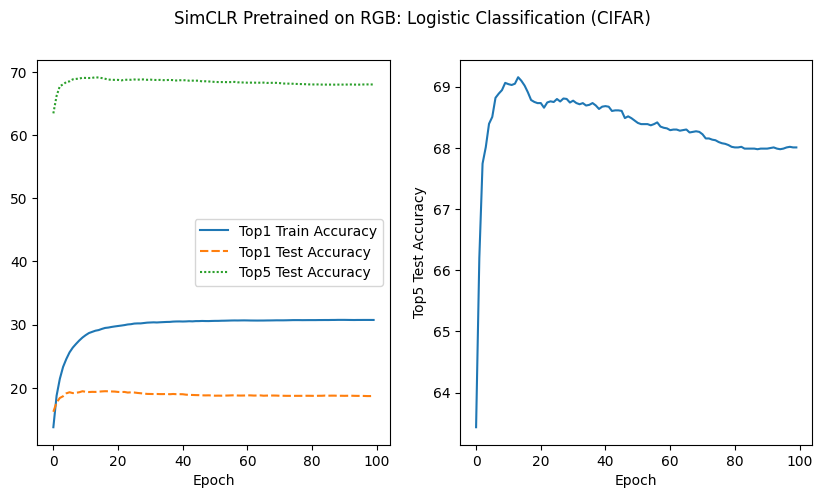

In [6]:
graph_downstream_performance(rgb_cifar10_100ep,'RGB', 'CIFAR')

Maximum Top5 Accuracy:  71.80204772949219 
At Epoch:  13.0


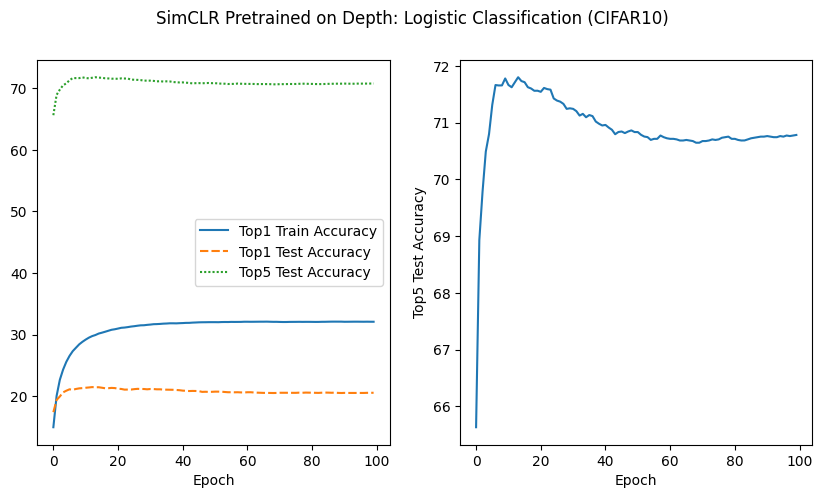

In [7]:
graph_downstream_performance(depth_cifar10_100ep, 'Depth', 'CIFAR10')

Maximum Top5 Accuracy:  69.15499114990234 
At Epoch:  13.0
Maximum Top5 Accuracy:  71.80204772949219 
At Epoch:  13.0
Difference Between Max Top5 Accuracy: (rgb - depth) -2.6470565795898438


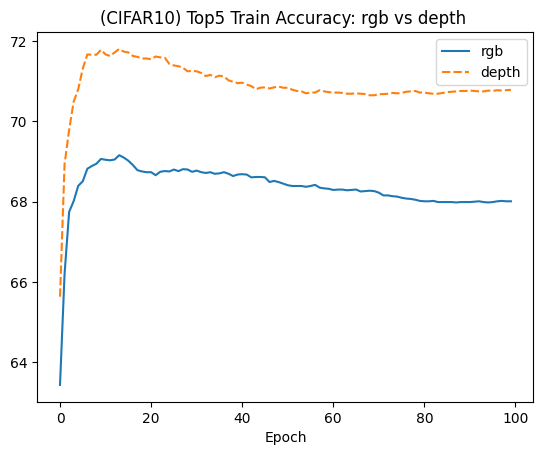

In [37]:
graph_top5_comparison_two(rgb_cifar10_100ep, depth_cifar10_100ep, 'rgb', 'depth', 'CIFAR10')

In [ ]:
cifar_epoch0 = pd.concat([rgb_cifar10_100ep.head(1),depth_cifar10_100ep.head(1)],axis=0)
cifar_epoch0['Model'] = ['rgb_cifar10', 'depth_cifar10']
cifar_epoch0


,Top1 Train Accuracy,Top1 Test Accuracy,Top5 Test Accuracy,Model
Epoch,,,,
0.0,13.773118,16.214958,63.435207,rgb_cifar10
0.0,14.947783,17.392004,65.631889,depth_cifar10


## II. Finetuned and Evaluated against the STL10 Database

Maximum Top5 Accuracy:  73.10546875 
At Epoch:  75.0


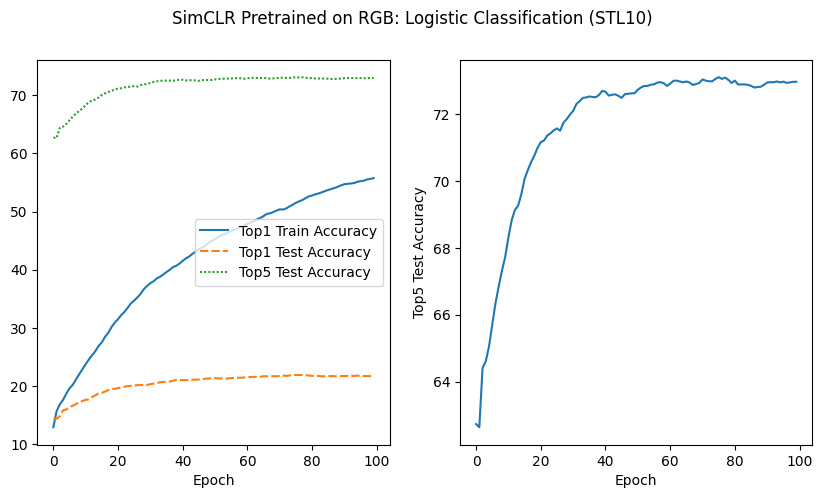

In [ ]:
graph_downstream_performance(rgb_stl10_100ep, 'RGB', 'STL10')

Maximum Top5 Accuracy:  61.85791015625 
At Epoch:  25.0


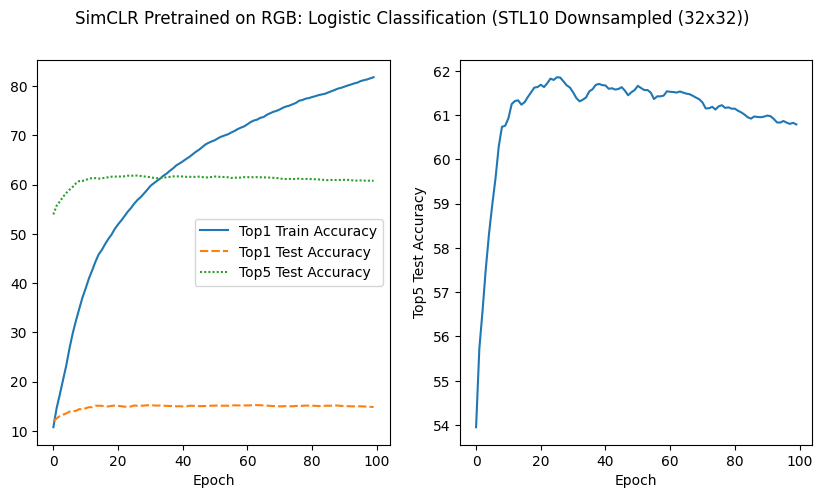

In [ ]:
graph_downstream_performance(rgb_imgs_equal_stl10_100ep, 'RGB', 'STL10 Downsampled (32x32)')

Maximum Top5 Accuracy:  72.77587890625 
At Epoch:  94.0


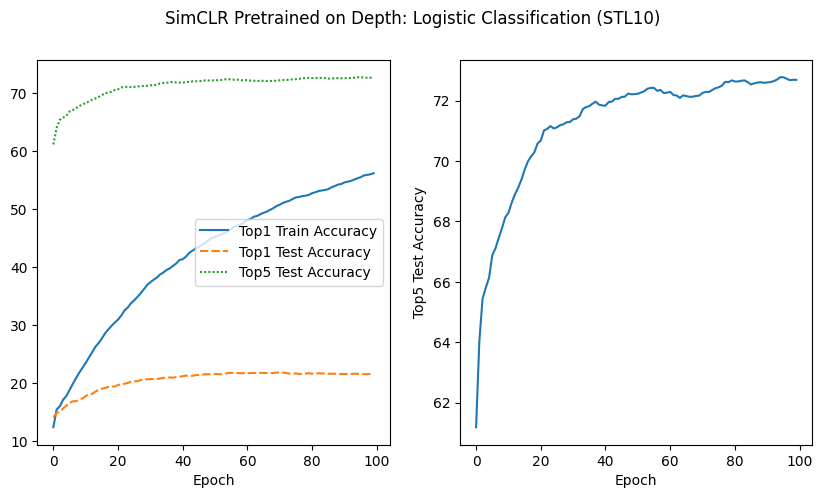

In [ ]:
graph_downstream_performance(depth_stl10_100ep, 'Depth', 'STL10')

Maximum Top5 Accuracy:  62.44384765625 
At Epoch:  23.0


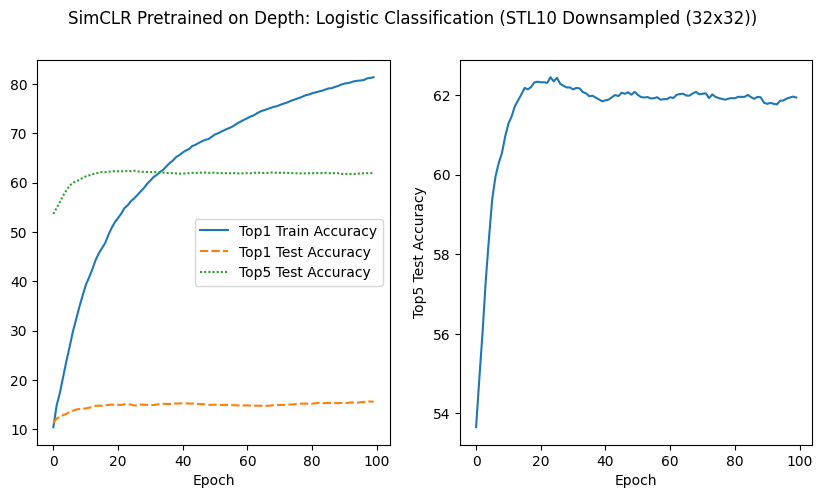

In [ ]:
graph_downstream_performance(depth_imgs_equal_stl10_100ep, 'Depth', 'STL10 Downsampled (32x32)')

Maximum Top5 Accuracy:  73.10546875 
At Epoch:  75.0
Maximum Top5 Accuracy:  72.77587890625 
At Epoch:  94.0
Difference Between Max Top5 Accuracy: (rgb - depth) 0.32958984375


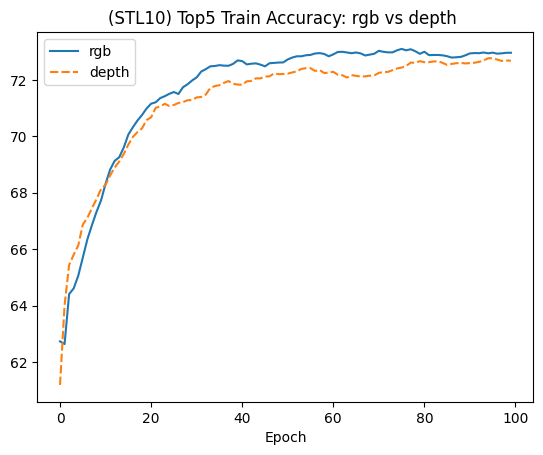

In [10]:
graph_top5_comparison_two(rgb_stl10_100ep, depth_stl10_100ep, 'rgb', 'depth', 'STL10')

Maximum Top5 Accuracy:  61.85791015625 
At Epoch:  25.0
Maximum Top5 Accuracy:  62.44384765625 
At Epoch:  23.0
Difference Between Max Top5 Accuracy: (rgb - depth) -0.5859375


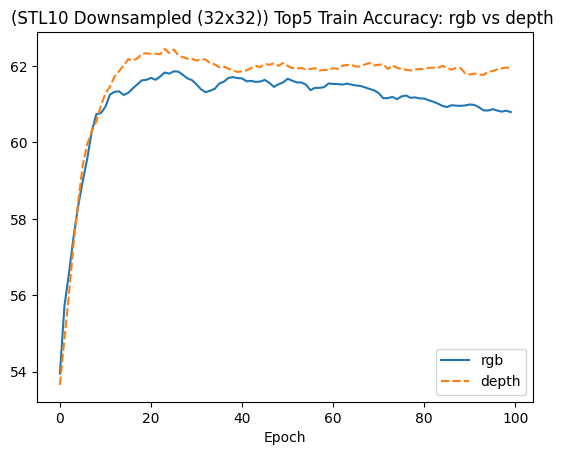

In [11]:
graph_top5_comparison_two(rgb_imgs_equal_stl10_100ep, depth_imgs_equal_stl10_100ep, 'rgb', 'depth', 'STL10 Downsampled (32x32)')

In [12]:
stl10_epoch0 = pd.concat([rgb_stl10_100ep.head(1),depth_stl10_100ep.head(1)],axis=0)
stl10_epoch0['Model'] = ['rgb_stl10', 'depth_stl10']
stl10_epoch0


,Top1 Train Accuracy,Top1 Test Accuracy,Top5 Test Accuracy,Model
Epoch,,,,
0.0,12.886029,14.401855,62.727051,rgb_stl10
0.0,12.432216,14.091797,61.181641,depth_stl10


## III. Analysis and Conclusion

- Both SimCLR models pretrained on Depth and RGB performed well above average in the image classificationd ownstream task at Epoch 0, indicating that both models learned useful representations on images during the pretraining step, even before finetuning. 
    - When testing on the CIFAR10 dataset at epoch 0, we notice that the depth model performs better overall compared to the RGB model.
    - When testing on the STL10 dataset at epoch 0, we notice that the performances of both models are very close, with rgb performing a little better.
    - The observations above leads us to infer that the SimCLR model trained on depth data learned better representations from the image data during the pretraining step as compared to the SimCLR model trained on RGB data.

- The Maximum Top5 Accuracies of the models Finetuned/Tested on CIFAR10 as follows
    - SimCLR pretrained on RGB   -> Finetuned/Tested on CIFAR10:      69.15499114990234 @ Epoch 13.0
    - SimCLR pretrained on Depth -> Finetuned/Tested on CIFAR10:      71.80204772949219 @ Epoch 13.0
    - Difference Between Max Top5 Accuracy (rgb - depth):  -2.6470565795898438
    
- The Maximum Top5 Accuracies of the models Finetuned/Tested on STL10are as follows        
    - SimCLR pretrained on RGB   -> Finetuned/Tested on STL10:        73.10546875       @ Epoch 75.0
    - SimCLR pretrained on Depth -> Finetuned/Tested on STL10:        72.77587890625    @ Epoch 94.0
    - Difference Between Max Top5 Accuracy (rgb - depth):  0.32958984375

- We notice that the models performed better on the STL10 dataset, this is worth further investigation, since the STL10 dataset contains supervised training images (500 images/class @ 10 classes) vs CIFAR (600 images/ class @ 10 classes). 
    - A possible avenue for investigation is varying the input image sizes. While CIFAR has more images for training, its image size is 32x32, while STL10 has an image size of 96x96. What will happen if we downsample STL10 to 32x32?

- The SimCLR model pretrained on RGB performed marginally better than the model trained on Depth when testing on the STL10 dataset, while the SimCLR model pretrained on depth significantly outperformed the one pretrained on RGB when testing on the CIFAR10 dataset. This may indicate that a SimCLR model pretrained on depth outperforms those that are trained on RGB when operating on low resolution images, while SimCLR models pretrained on RGB show their strength on higher-resolution or more detailed images.
    - We will explore this further when we start varying the lighting, noise, image size, and blur (among others) of the dataset used for pretraining the models.
    - We may also explore this by conducting similar experiments on other SSL methods such as MoCo
    

### IV. Further Comparisons

Maximum Top5 Accuracy:  61.85791015625 
At Epoch:  25.0
Maximum Top5 Accuracy:  69.15499114990234 
At Epoch:  13.0
Difference Between Max Top5 Accuracy: (rgb-stl10 - rgb-cifar10) -7.297080993652344


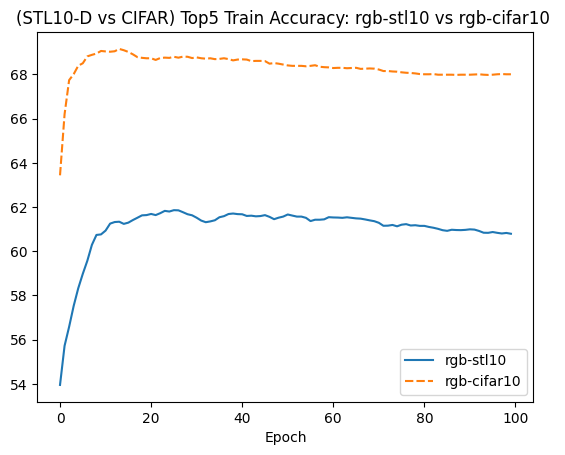

In [13]:
graph_top5_comparison_two(rgb_imgs_equal_stl10_100ep, rgb_cifar10_100ep, 'rgb-stl10', 'rgb-cifar10', 'STL10-D vs CIFAR')

Maximum Top5 Accuracy:  62.44384765625 
At Epoch:  23.0
Maximum Top5 Accuracy:  71.80204772949219 
At Epoch:  13.0
Difference Between Max Top5 Accuracy: (depth-stl10 - depth-cifar10) -9.358200073242188


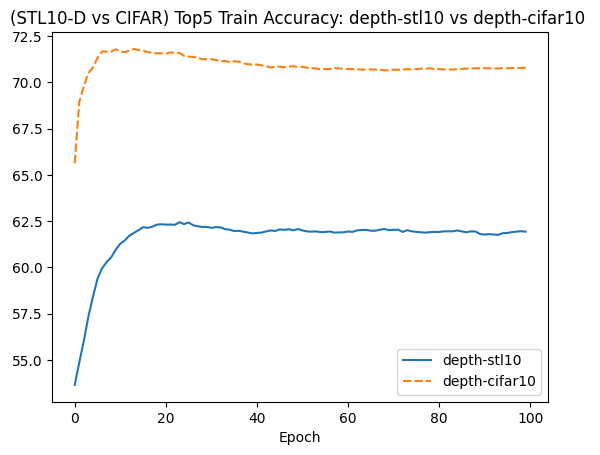

In [14]:
graph_top5_comparison_two(depth_imgs_equal_stl10_100ep, depth_cifar10_100ep, 'depth-stl10', 'depth-cifar10', 'STL10-D vs CIFAR')

### V. Brightness Comparisons

graph performance of brightness on cifar
graph performance of brightness on stl

compare performance of of regular vs brightness adjusted on stl
compare performance of of regular vs brightness adjusted on cifar


Maximum Top5 Accuracy:  69.09467315673828 
At Epoch:  9


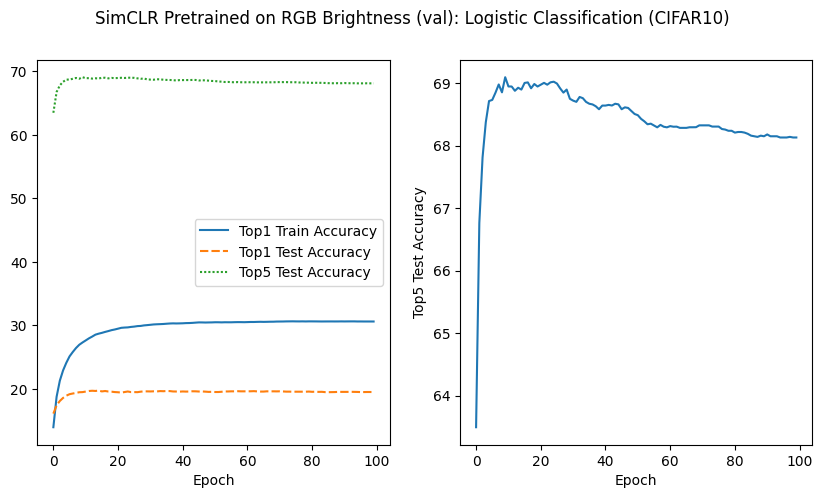

In [15]:
graph_downstream_performance(rgb_brightness_cifar10_100ep, 'RGB Brightness (val)', 'CIFAR10')

Maximum Top5 Accuracy:  71.51123046875 
At Epoch:  63


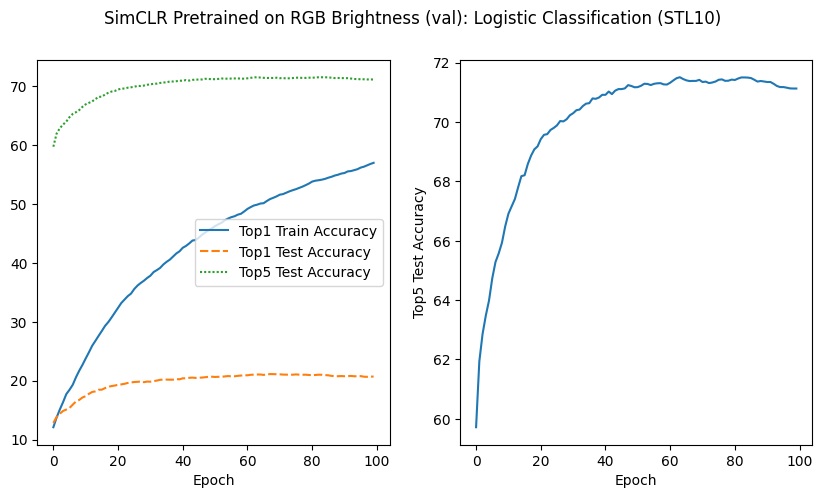

In [ ]:
graph_downstream_performance(rgb_brightness_stl10_100ep, 'RGB Brightness (val)', 'STL10')

Maximum Top5 Accuracy:  71.51123046875 
At Epoch:  63
Maximum Top5 Accuracy:  73.10546875 
At Epoch:  75.0
Difference Between Max Top5 Accuracy: (RGB Bright - RGB) -1.59423828125


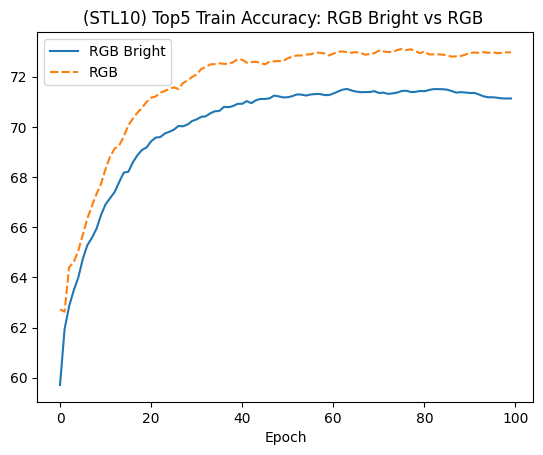

In [16]:
graph_top5_comparison_two(rgb_brightness_stl10_100ep, rgb_stl10_100ep, "RGB Bright", "RGB", "STL10")

Maximum Top5 Accuracy:  69.09467315673828 
At Epoch:  9
Maximum Top5 Accuracy:  69.15499114990234 
At Epoch:  13.0
Difference Between Max Top5 Accuracy: (RGB Bright - RGB) -0.0603179931640625


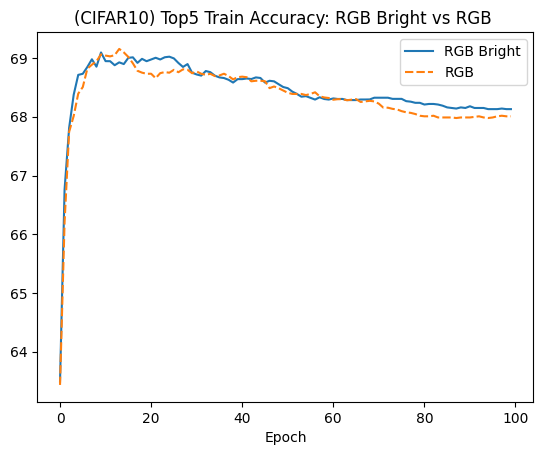

In [17]:
graph_top5_comparison_two(rgb_brightness_cifar10_100ep, rgb_cifar10_100ep, "RGB Bright", "RGB", "CIFAR10")

Maximum Top5 Accuracy: rgb-bright-cifar 69.09467315673828 
At Epoch:  9
Maximum Top5 Accuracy: rgb-bright-stl 71.51123046875 
At Epoch:  63
Maximum Top5 Accuracy: rgb-cifar 69.15499114990234 
At Epoch:  13.0
Maximum Top5 Accuracy: rgb-stl 73.10546875 
At Epoch:  75.0


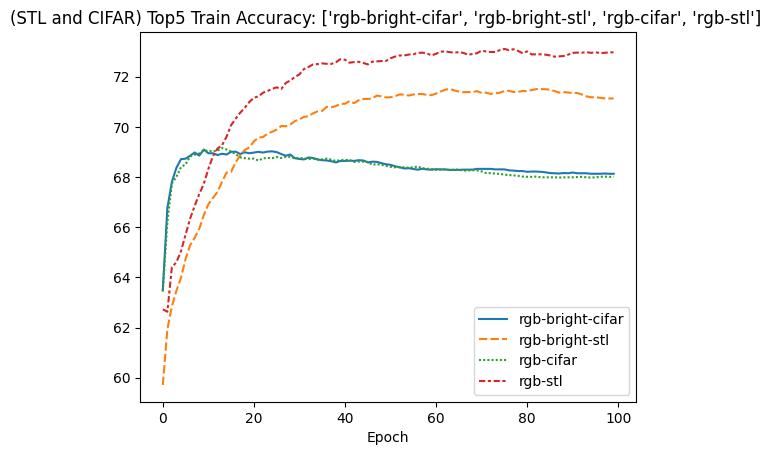

In [ ]:
graph_top5_comparison_many([rgb_brightness_cifar10_100ep,rgb_brightness_stl10_100ep,rgb_cifar10_100ep,rgb_stl10_100ep], ["rgb-bright-cifar", "rgb-bright-stl","rgb-cifar","rgb-stl"],"STL and CIFAR")

### VI. Luminosity Tests

Maximum Top5 Accuracy: low-luminosity-stl10 71.05712891 
At Epoch:  69
Maximum Top5 Accuracy: low-luminosity-cifarl10 71.27470398 
At Epoch:  9


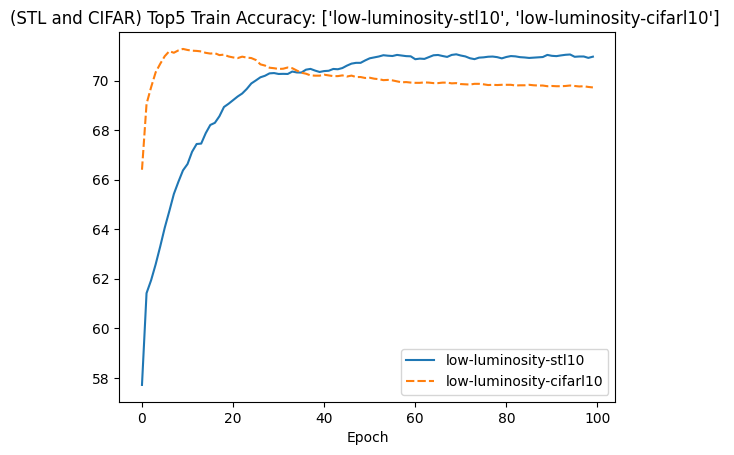

In [18]:
graph_top5_comparison_many([low_luminosity_stl10_100ep,low_luminosity_cifarl10_100ep], ["low-luminosity-stl10", "low-luminosity-cifarl10"],"STL and CIFAR")

### VII. Field of View Tests

Maximum Top5 Accuracy: rgb-stl10 73.10546875 
At Epoch:  75.0
Maximum Top5 Accuracy: rgb-cifar10 69.15499114990234 
At Epoch:  13.0
Maximum Top5 Accuracy: highfov-cifar10 69.44508362 
At Epoch:  6
Maximum Top5 Accuracy: lowfov-cifar10 68.18704224 
At Epoch:  8
Maximum Top5 Accuracy: highfov-stl10 71.92626953 
At Epoch:  82
Maximum Top5 Accuracy: lowfov-stl10 72.31445313 
At Epoch:  58


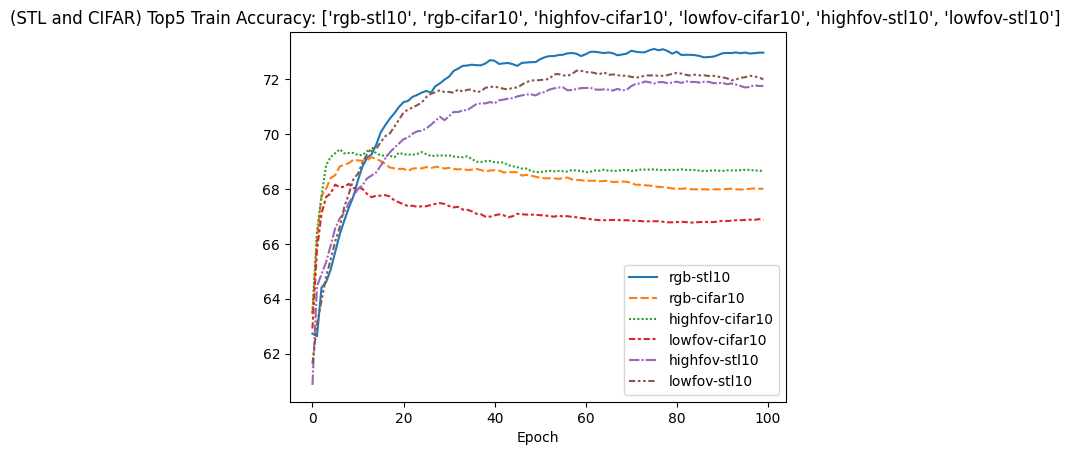

In [21]:
graph_top5_comparison_many([rgb_stl10_100ep,rgb_cifar10_100ep,highfov_cifar10_100ep,lowfov_cifar10_100ep,highfov_stl10_100ep,lowfov_stl10_100ep], ["rgb-stl10","rgb-cifar10","highfov-cifar10","lowfov-cifar10","highfov-stl10","lowfov-stl10"],"STL and CIFAR")

### VIII. Analyses

Maximum Top5 Accuracy: rgb_cifar10 69.15499114990234 
At Epoch:  13.0
Maximum Top5 Accuracy: depth_cifar10 71.80204772949219 
At Epoch:  13.0
Maximum Top5 Accuracy: rgb_stl10 73.10546875 
At Epoch:  75.0
Maximum Top5 Accuracy: depth_stl10 72.77587890625 
At Epoch:  94.0
Maximum Top5 Accuracy: rgb_imgs_equal_stl10 61.85791015625 
At Epoch:  25.0
Maximum Top5 Accuracy: depth_imgs_equal_stl10 62.44384765625 
At Epoch:  23.0
Maximum Top5 Accuracy: rgb_brightness_cifar10 69.09467315673828 
At Epoch:  9
Maximum Top5 Accuracy: rgb_brightness_stl10 71.51123046875 
At Epoch:  63
Maximum Top5 Accuracy: low_luminosity_stl10 71.05712891 
At Epoch:  69
Maximum Top5 Accuracy: low_luminosity_cifarl10 71.27470398 
At Epoch:  9
Maximum Top5 Accuracy: highfov_stl10 71.92626953 
At Epoch:  82
Maximum Top5 Accuracy: lowfov_stl10 72.31445313 
At Epoch:  58
Maximum Top5 Accuracy: highfov_cifar10 69.44508362 
At Epoch:  6
Maximum Top5 Accuracy: lowfov_cifar10 68.18704224 
At Epoch:  8


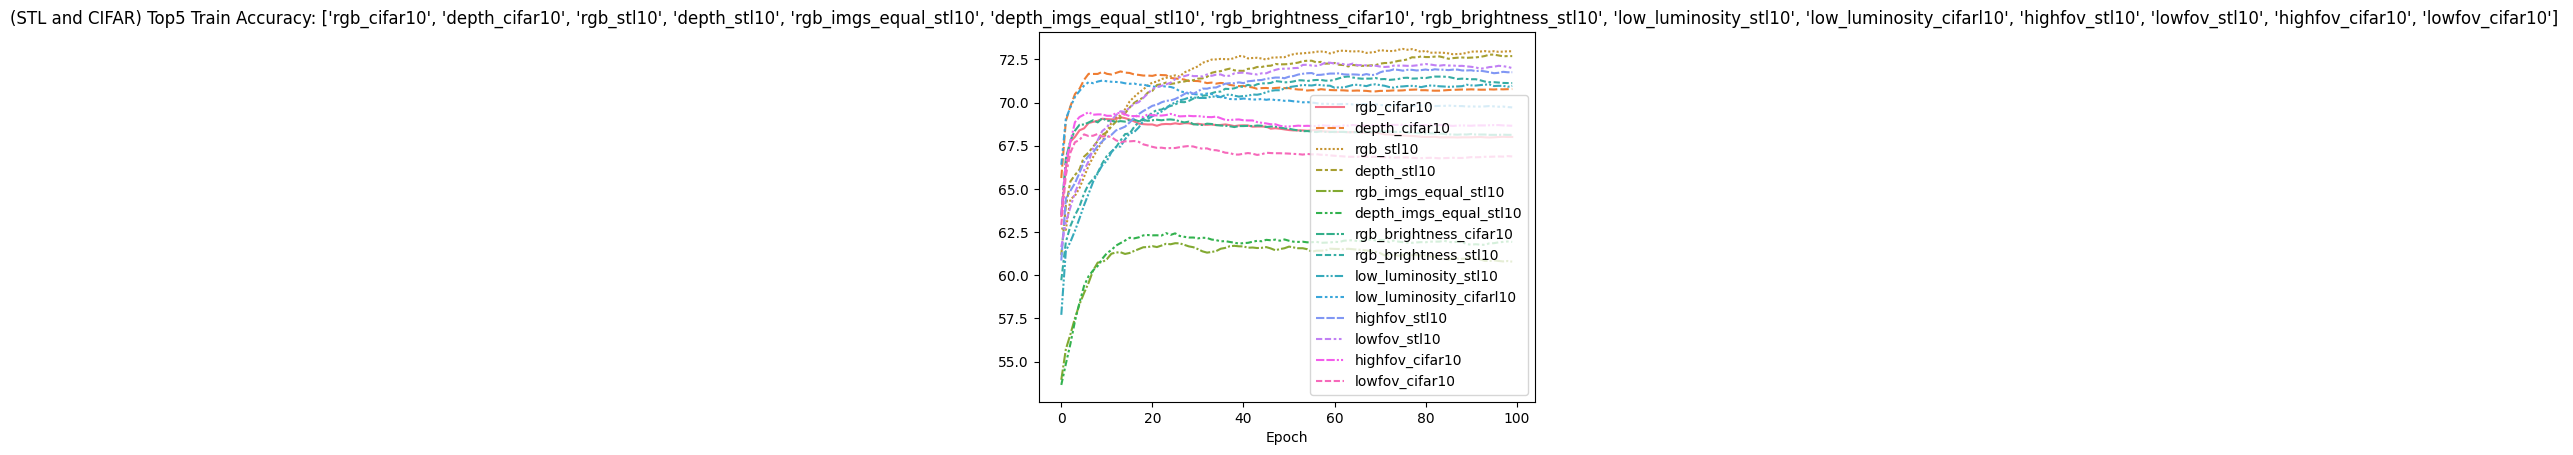

In [36]:
#graph_top5_comparison_many(Data, [str(i) for i in range(len(Data))],"STL and CIFAR")
graph_top5_comparison_many(Data, Datasets,"STL and CIFAR")